<a href="https://colab.research.google.com/github/PabloJRW/TensorFlow_Developer_Certificate/blob/main/Neural_Network_Regression_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

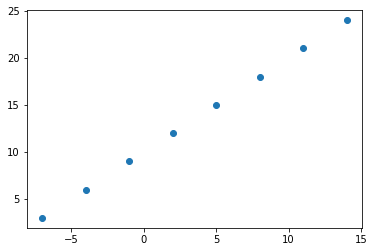

In [ ]:
# Create features
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14 ])

# Create labels
y = np.array([3, 6, 9, 12, 15, 18, 21, 24])

# Visualize it
plt.scatter(X, y)
plt.show()

## Input and output shapes

In [ ]:
# Create a demo for our housing price prediction problem 
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our numpy arrays to tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling ith Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling the model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interprete the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create a model using Seuential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1)) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 345ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 65ms/step


array([[12.716021]], dtype=float32)

## Improving our model

We can improve the model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling the model** - here we might change the optimization function or perhaps the learning rate of activation function.
3. **Fitting the model** - here we might fit the model for more epochs (leave it training for longer) or on more data to learn from.

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 392ms/step - loss: 15.2829 - mae: 15.2829
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 14.5987 - mae: 14.5987
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 13.9060 - mae: 13.9060
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 13.2340 - mae: 13.2340
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 12.5730 - mae: 12.5730
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 11.9168 - mae: 11.9168
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 11.2602 - mae: 11.2602
Epoch 8/200
1/1 [==============================] - 0s 14ms/step - loss: 10.6017 - mae: 10.6017
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 9.9606 - mae: 9.9606
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 9.3868 - mae: 9.3868
Epoch 11/200
1/1 [==============================] - 0s 

In [ ]:
# Let's see if our model prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 118ms/step


array([[26.992025]], dtype=float32)

### Evaluating the model

It's a good idea to visualze:
* The data - What data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - How does a model perform while it learns?
* The predictions of the model - How do the predictions of a model line up against the ground truth

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

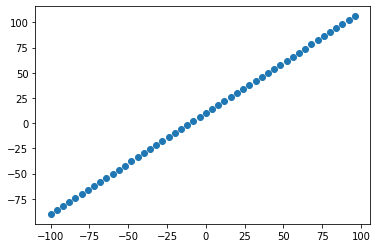

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

### The 3 sets...

* **Training set** - the model learns from this data, which is tiopically 70-80% of the of the total data you have available.
* **Validation data** - the model gets tuned on this data, which is tipically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is tipically 10-15% of the total data available.

In [ ]:
# Check the lenght of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # Last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

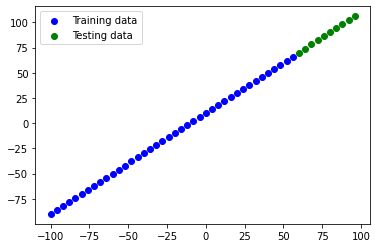

In [ ]:
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()
plt.show()

In [ ]:
tf.random.set_seed(42)

# Let's have a look at how to build a neural network  for our data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, 
                          activation="relu",
                          input_shape=[1],
                          name="input_layer"),
    tf.keras.layers.Dense(100,
                          activation="relu",
                          name="hidden_layer_1"),
    tf.keras.layers.Dense(100,
                          activation="relu",
                          name="hidden_layer_2"),
    tf.keras.layers.Dense(1,
                          name="output_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=200, verbose=0)

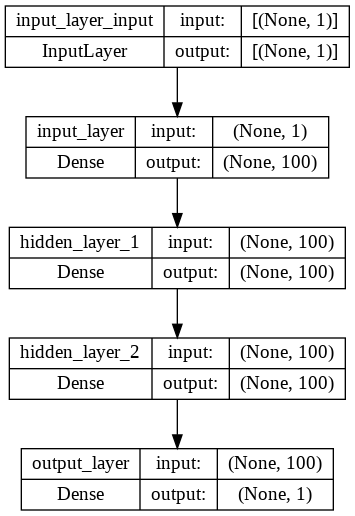

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 71ms/step


array([[ 72.19445 ],
       [ 76.35261 ],
       [ 80.52263 ],
       [ 84.70795 ],
       [ 88.89326 ],
       [ 93.07857 ],
       [ 97.263885],
       [101.47788 ],
       [105.7074  ],
       [109.936905]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground thruth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()
  plt.show()

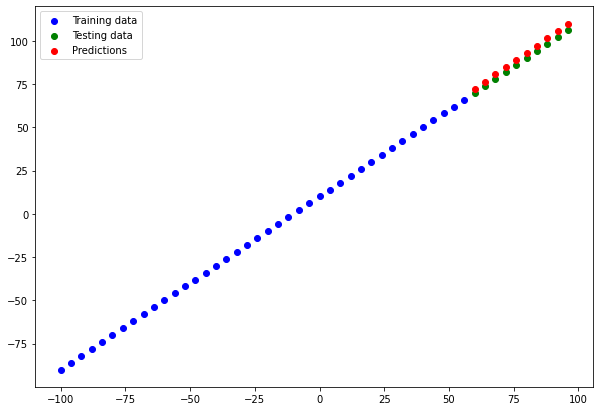

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions"
* **MSE** - mean squared error, "square the average erros"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 157ms/step - loss: 3.0135 - mae: 3.0135


[3.0135498046875, 3.0135498046875]

In [ ]:
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.013553>

In [ ]:
# Calculate the mean squared error
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=9.388815>

### A larger example

In [1]:
# import required libraries 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# One-hot encoding our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
# Create X and y values (features and values)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [6]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [11]:
# Build a neural network }
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7493.1743 - mae: 7493.1743

In [12]:
# Check the results on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [13]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### Right now it looks like our model isn't performing too well...let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer

In [15]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [18]:
# Evaluate our second model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [24]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, 
                      y_train, 
                      epochs=200, 
                      verbose=0)

In [22]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

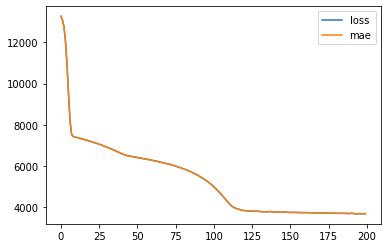

In [25]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()